# Companion to the chapter 9 of LA4DS

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from latools import projection, second_projection, enorm, matrix, frobenius_distance, frobenius_norm
import math
import seaborn as sns

In [2]:
A = 1/2**0.5 * np.array([[1, 1], [-1, 1]])

(-2.0, 2.0, -2.0, 2.0)

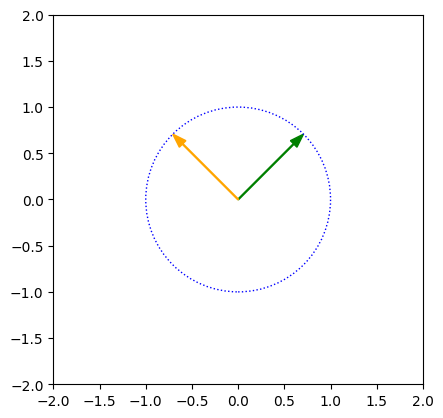

In [3]:
plt.arrow(0,0, *A[0], color = 'green', length_includes_head=True, width=0.01, head_width=0.1)
plt.arrow(0,0, *A[1], color = 'orange', length_includes_head=True, width=0.01, head_width=0.1)
circle1 = plt.Circle((0, 0), 1, color='b', fill=False, linestyle=':', linewidth=1)
plt.gca().add_patch(circle1)

plt.axis('square')
plt.axis([-2,2,-2,2])

Let's try ortogonalization

In [26]:
B = np.random.randint(-5, 5, (2,2))
B

array([[-3,  4],
       [-1,  2]])

In [27]:
# First column
q_0 = enorm(B[:, 0], 1)
q_0

array([-0.9486833 , -0.31622777])

In [28]:
help(second_projection)

Help on function second_projection in module latools:

second_projection(projected, base)
    Calculates the projection ortogonal to the base



In [29]:
# Second column
q_1 = enorm(second_projection(B[:,1], q_0), 1)
q_1

array([-0.31622777,  0.9486833 ])

In [30]:
Q = np.column_stack([q_0, q_1])
Q

array([[-0.9486833 , -0.31622777],
       [-0.31622777,  0.9486833 ]])

(-3.35, 4.35, -1.15, 6.549999999999999)

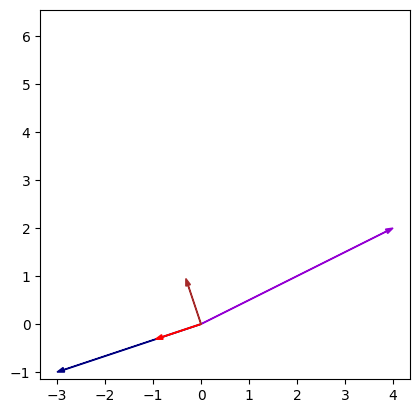

In [31]:
plt.arrow(0,0, *B[:, 0], color='navy', width=0.01,length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *B[:, 1], color='darkviolet', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *q_0, color='r', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *q_1, color='brown', width=0.01, length_includes_head=True, head_width=0.1)

plt.axis([-6, 6, -6, 6])
plt.axis('square')

In [32]:
# Let us see that QtQ is E

np.round(Q.T @ Q, 5)

array([[1., 0.],
       [0., 1.]])

In [33]:
# Now let-s find a QR ortogonalization

# B = QR
# QtB = QtQR
# QtB = R

R = np.round(Q.T @ B, 5)
R

array([[ 3.16228, -4.42719],
       [ 0.     ,  0.63246]])

In [34]:
np.round(Q @ R, 5) == B #> True

array([[ True,  True],
       [ True,  True]])

Comparing with np realization

In [35]:
Q,R

(array([[-0.9486833 , -0.31622777],
        [-0.31622777,  0.9486833 ]]),
 array([[ 3.16228, -4.42719],
        [ 0.     ,  0.63246]]))

In [36]:
np.linalg.qr(B)

QRResult(Q=array([[-0.9486833 , -0.31622777],
       [-0.31622777,  0.9486833 ]]), R=array([[ 3.16227766, -4.42718872],
       [ 0.        ,  0.63245553]]))

# Exercises

## Exercise 9.1

Illustrate that

$$ Q^TQ = QQ^T = Q^{-1}Q = QQ^{-1} = E $$

Well, the first two are obvious due to the fact that Q^T is an inverse matrix of Q. 
And the last two are true for any invertible matrix. 

Let us however prove that Q^t is an inverse of Q;

Consider $$ K = Q^TQ$$

The i,j element of K equals to

$$k_{i,j} = q'_i * \hat{q_j} $$

where q'_i is a row in Q^T and q_j is a column in Q, meaning that

$$ k_{i,j} = \hat{q_i} * \hat{q_j} <=> k_{i,j} = 0 (i\neq j) OR k_{i,j} = 1 (i=j) <=> K=E => Q^T = Q^{-1} $$

I hope that replaces illustaration with random matrices


## Exercise 9.2

GS-ortogonalization

Well the majority of GS-procedure was made in the first part, but only for the 2x2 matrix; let's do the case for matrices of all sizes

In order to prove that we need to consider the following fact:

if c - vector, a and b - two projections on some plane, a.b = 0 ('.' denotes dot product);

d = c - (a+b) perpendicular to that plane
_____________________________________
1)
let's prove that c - (a+b) is perpendicular to a

Consider a.(c - (a+b)) 

a.(c - (a+b)) = a.c - a.(a+b) = a.c - a.a - a.b = (1);

a.b equals zero, hence

(1) = a.c - a.a = a.(c-a) = 0, because c-a is perpendicular to a (a is projection);

2) 
The same logic naturally applies to b; since d is perpendicular to two vectors of a plane, it means that d perpendicular to the plane, q.e.d

It might be applied to any number of vectors by virtue of mathematical induction;

In fact, let us consider that vector minus sum of n projections of vector onto n-dimensional hyperplane is perpendicular to said hyperplane, let-s prove that that vector minus sum of the n+1 projections will be perpendicular to the n+1 hyperplane.

It's easy: we just supplement vector b in the first part of our prove with sum of n projections, and vector b would be our n+1th projection.

What we should have proved is the fact that there are n ortogonal vectors in a n-dimensional hyperplane, but I think it can be done via rank consideration


In [37]:
def gs_q(X):
    Q = []
    Q.append(enorm(X[:,0],1))
    for i in range(1, X.shape[1]):
        p = np.sum([projection(X[:,i], q) for q in Q], axis=0) # sum of projections
        q = X[:,i] - p # obtaining perpendicular
        q = enorm (q,1) # normalizing vector
        Q.append(q)
    return np.column_stack(Q) # creates column matrix

In [47]:
# Test

G = matrix(10)
G

array([[  4,   5,   8,   6,  -8,   1,   1,  -5,  -2,   8],
       [  8,   0,   7,   5,   8,  -9,  -4,   9,  -9,   2],
       [ -2,  -2,  -9,  -1,   8,  -6,   3,   5,  -4,  -3],
       [  0,   7,  -6,   6,  -6,  -7,  -9,   4,   8,  -9],
       [ -4,  -5,  -9,   8,   8,  -4,   0,  -7,  -4, -10],
       [ -7,  -9,  -6,   8,   4,  -7,   3,  -6,   9,  -6],
       [  8,  -2, -10,  -6,   1,  -3,  -7,  -1,   4,  -7],
       [ -6,   5,   7,  -8,   5,   0,  -1,  -8,  -6, -10],
       [ -7, -10,  -7,  -8,   5,   7,   9,  -3,   2,  -1],
       [  8,  -1,   1,   9,   0,   8,  -9,  -7,  -4,  -1]])

In [48]:
Q = gs_q(G)
Q

array([[ 0.21023533,  0.22067699,  0.21175899,  0.25488769, -0.28745506,
        -0.08373159,  0.40104465, -0.60737514,  0.0519778 , -0.41857939],
       [ 0.42047066, -0.16475429,  0.33389225,  0.11846492,  0.57556756,
        -0.39142744, -0.02279194,  0.23158828, -0.15453636, -0.32865625],
       [-0.10511767, -0.08003308, -0.38783058, -0.03408666,  0.4439107 ,
         0.01929027,  0.5454868 ,  0.01362618,  0.57764881, -0.04606555],
       [ 0.        ,  0.42427579, -0.58370568,  0.3148373 , -0.07273686,
        -0.10192219, -0.2667685 ,  0.27215243, -0.0468919 , -0.46588109],
       [-0.21023533, -0.22067699, -0.26431539,  0.41441834,  0.35503313,
         0.23601977,  0.11617057, -0.32118771, -0.59598638,  0.10902668],
       [-0.36791183, -0.40133744,  0.0594575 ,  0.44609656, -0.08995626,
        -0.43456225, -0.35895789, -0.18776064,  0.37303492,  0.02890416],
       [ 0.42047066, -0.28597595, -0.48289014, -0.43391668, -0.01237407,
        -0.22041735, -0.26450838, -0.4471355 

In [49]:
q,_ = np.linalg.qr(G)
q

array([[-0.21023533,  0.22067699,  0.21175899, -0.25488769,  0.28745506,
        -0.08373159,  0.40104465,  0.60737514, -0.0519778 , -0.41857939],
       [-0.42047066, -0.16475429,  0.33389225, -0.11846492, -0.57556756,
        -0.39142744, -0.02279194, -0.23158828,  0.15453636, -0.32865625],
       [ 0.10511767, -0.08003308, -0.38783058,  0.03408666, -0.4439107 ,
         0.01929027,  0.5454868 , -0.01362618, -0.57764881, -0.04606555],
       [-0.        ,  0.42427579, -0.58370568, -0.3148373 ,  0.07273686,
        -0.10192219, -0.2667685 , -0.27215243,  0.0468919 , -0.46588109],
       [ 0.21023533, -0.22067699, -0.26431539, -0.41441834, -0.35503313,
         0.23601977,  0.11617057,  0.32118771,  0.59598638,  0.10902668],
       [ 0.36791183, -0.40133744,  0.0594575 , -0.44609656,  0.08995626,
        -0.43456225, -0.35895789,  0.18776064, -0.37303492,  0.02890416],
       [-0.42047066, -0.28597595, -0.48289014,  0.43391668,  0.01237407,
        -0.22041735, -0.26450838,  0.4471355 

In [66]:
np.round(np.sum((q+Q), axis=0), 5) * np.round(np.sum((q-Q), axis=0), 5)

array([-0., -0., -0.,  0., -0., -0.,  0., -0., -0., -0.])

In order to understand why we consider q+Q and q-Q, I address to Mike X Cohen's book

## Exercise 9.3

In [67]:
K = matrix(6)

U,_ = np.linalg.qr(K)
U

array([[-0.13159034,  0.34395729, -0.24644205,  0.65449874, -0.3740659 ,
        -0.48512863],
       [ 0.06579517, -0.29163849,  0.32565997, -0.40927755, -0.23122058,
        -0.76393226],
       [ 0.39477102,  0.28438638, -0.28422048, -0.40102138, -0.68578022,
         0.22668545],
       [-0.59215653,  0.3512094 ,  0.60598498, -0.09428501, -0.318475  ,
         0.22015636],
       [ 0.65795169,  0.43409068,  0.54494451,  0.19458064,  0.20491142,
        -0.04301182],
       [ 0.19738551, -0.63559578,  0.29706617,  0.44334394, -0.43920635,
         0.2816959 ]])

In [71]:
q,_ = np.linalg.qr(U)
np.round(q,3)

array([[-0.132,  0.344, -0.246,  0.654, -0.374, -0.485],
       [ 0.066, -0.292,  0.326, -0.409, -0.231, -0.764],
       [ 0.395,  0.284, -0.284, -0.401, -0.686,  0.227],
       [-0.592,  0.351,  0.606, -0.094, -0.318,  0.22 ],
       [ 0.658,  0.434,  0.545,  0.195,  0.205, -0.043],
       [ 0.197, -0.636,  0.297,  0.443, -0.439,  0.282]])

In [70]:
# q == U because U is already orthonormal matrix

In [73]:
T = np.column_stack([enorm(U[:,i], 10+i) for i in range(0, 6)])

In [74]:
Q,R = np.linalg.qr(T)

In [76]:
np.round(R,3)

array([[10.,  0.,  0.,  0., -0., -0.],
       [ 0., 11., -0., -0.,  0.,  0.],
       [ 0.,  0., 12.,  0., -0., -0.],
       [ 0.,  0.,  0., 13.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 15.]])

In [77]:
np.round(Q.T @ Q)

array([[ 1.,  0., -0.,  0., -0., -0.],
       [ 0.,  1., -0.,  0.,  0., -0.],
       [-0., -0.,  1., -0., -0., -0.],
       [ 0.,  0., -0.,  1., -0.,  0.],
       [-0.,  0., -0., -0.,  1., -0.],
       [-0., -0., -0.,  0., -0.,  1.]])

In [86]:
T1 = T.copy()

In [87]:
np.round(U1, 3)

array([[-0.132,  0.344, -0.246,  0.   , -0.374, -0.485],
       [ 0.066, -0.292,  0.326, -0.409, -0.231, -0.764],
       [ 0.395,  0.284, -0.284, -0.401, -0.686,  0.227],
       [-0.592,  0.351,  0.606, -0.094, -0.318,  0.22 ],
       [ 0.658,  0.434,  0.545,  0.195,  0.205, -0.043],
       [ 0.197, -0.636,  0.297,  0.443, -0.439,  0.282]])

In [89]:
T1[0,3] = 0
np.round(T1, 3)

array([[ -1.316,   3.784,  -2.957,   0.   ,  -5.237,  -7.277],
       [  0.658,  -3.208,   3.908,  -5.321,  -3.237, -11.459],
       [  3.948,   3.128,  -3.411,  -5.213,  -9.601,   3.4  ],
       [ -5.922,   3.863,   7.272,  -1.226,  -4.459,   3.302],
       [  6.58 ,   4.775,   6.539,   2.53 ,   2.869,  -0.645],
       [  1.974,  -6.992,   3.565,   5.763,  -6.149,   4.225]])

In [90]:
U2, R2 = np.linalg.qr(T1)

In [91]:
np.round(U2, 3)

array([[-0.132,  0.344, -0.246,  0.184, -0.468, -0.742],
       [ 0.066, -0.292,  0.326, -0.764,  0.039, -0.469],
       [ 0.395,  0.284, -0.284, -0.466, -0.558,  0.393],
       [-0.592,  0.351,  0.606, -0.089, -0.307,  0.238],
       [ 0.658,  0.434,  0.545,  0.212,  0.14 , -0.132],
       [ 0.197, -0.636,  0.297,  0.337, -0.595,  0.031]])

In [92]:
np.round(R2, 3)

array([[10.   ,  0.   ,  0.   ,  1.12 , -0.   , -0.   ],
       [ 0.   , 11.   , -0.   , -2.927,  0.   ,  0.   ],
       [ 0.   ,  0.   , 12.   ,  2.097, -0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   ,  9.077,  4.909,  6.821],
       [ 0.   ,  0.   ,  0.   ,  0.   , 13.111, -2.554],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , 13.113]])

## Exercise 9.4

Compare "classic" inverted and "QR" inverted

Some prelimenary consideration:

if 

$$ A = QR $$

Then

$$ A^{-1} = (QR)^{-1} = R^{-1}Q^{-1} = R^{-1}Q^T $$

In [107]:
# Classic inverted (see Exercise 8.2)

def minor(X, i, j):
    '''Creates minor of a matrix'''
    return X[
        np.array(list(range(i)) + list(range(i + 1, A.shape[0])))[:, np.newaxis],
        np.array(list(range(j)) + list(range(j + 1, A.shape[1]))),
    ]


def cofactor(X, i, j):
    '''Calculates (i,j) matrix cofactor'''
    return (-1)**(i+j) * np.linalg.det(minor (X, i, j))


def adj(X):
    '''Calculates adjacent matrix'''
    adj = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            adj[j,i] = cofactor(X, i, j) # pay attention that the index order is reversed in order to 
                                         # save time for transposing the matrix
    return adj
   
    
def invert(X):
    '''inverts matrix'''
    if np.linalg.det(X) == 0:
        raise Exception('Passed singular matrix')
    return adj(X) / np.linalg.det(X)

In [136]:
# Let's run exeperiment with 1000 matrices

classic_distance = []
qr_distance = []

for i in range(1000):
    A = matrix(30)
    V = invert(A)
    Q,R = np.linalg.qr(A)
    W = invert(R) @ Q.T
    v = frobenius_distance(np.eye(30), A@V)
    w = frobenius_distance(np.eye(30), A@W)
    classic_distance.append(v)
    qr_distance.append(w)

In [137]:
data = pd.DataFrame({'classic_inverted': classic_distance, 'qr_inverted': qr_distance})
data=pd.melt(data)
data

,variable,value
0,classic_inverted,1.269506e-12
1,classic_inverted,1.164728e-12
2,classic_inverted,3.840193e-13
3,classic_inverted,5.766968e-13
4,classic_inverted,4.506850e-13
...,...,...
1995,qr_inverted,2.770510e-13
1996,qr_inverted,3.642783e-13
1997,qr_inverted,7.665524e-13
1998,qr_inverted,2.258568e-13


<AxesSubplot:xlabel='variable', ylabel='value'>

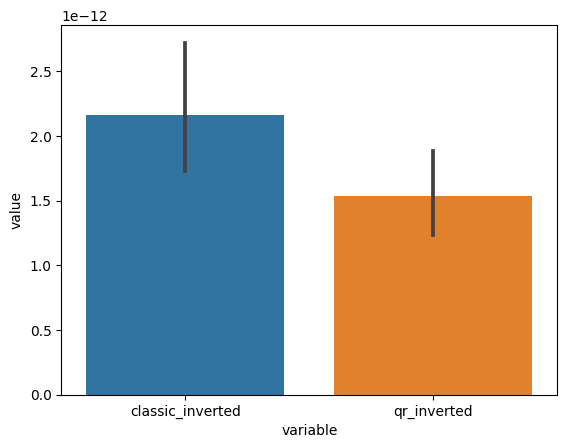

In [138]:
sns.barplot(data=data, x='variable', y='value')

In [134]:
# Not that big a difference

## Exercise 9.6

In [160]:
# I don't get that